<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/process/MultiphaseflowMeasurement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Multiphase flow measurements
#@markdown This document is part of the module ["Introduction to Gas Processing using NeqSim in Colab"](https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/examples_of_NeqSim_in_Colab.ipynb#scrollTo=_eRtkQnHpL70).
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
import numpy
import pandas as pd
%matplotlib inline

# Multiphase flow measurement
A multiphase flow meter is a device used to measure the individual phase flow rates of constituent phases in a given flow (for example in oil and gas industry) where oil, water and gas mixtures are initially co-mingled together during the oil production processes.

# Litterature

Wikipedia

https://en.wikipedia.org/wiki/Multiphase_flow_meter


HANDBOOK OF MULTIPHASE FLOW METERING:

https://nfogm.no/wp-content/uploads/2014/02/MPFM_Handbook_Revision2_2005_ISBN-82-91341-89-3.pdf

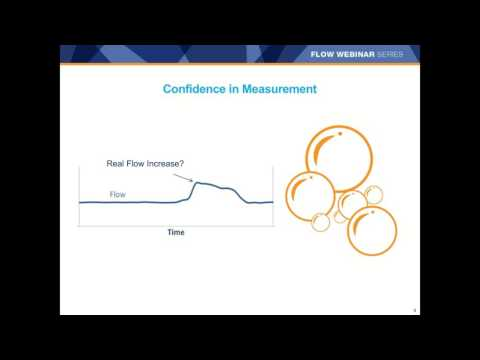

In [2]:
#@title Webinar: Advances in Multiphase Metering for Onshore Measurement in Oil & Gas
#@markdown This video gives an intriduction to Oil & Gas facilities Design
from IPython.display import YouTubeVideo
YouTubeVideo('mcxrjJwidl0', width=600, height=400)

# Mathematics of multi phase meters
Including the most important equations for a multiphase flow meter (MPFM) in the oil and gas industry involves understanding the principles of fluid dynamics and measurement technologies that these devices use. Here are some of the key equations and concepts:

1. **Flow Rate Measurement**:
   - For each phase (oil, water, gas), the flow rate $ Q $ can be estimated using the equation:
   $Q = A\times v$
   where $ A $ is the cross-sectional area of the pipe, and $ v $ is the velocity of the phase.

2. **Differential Pressure Measurement**:
   - Differential pressure (ΔP) is often used to infer flow rate, especially for gas phases, using a version of the Bernoulli equation:
     $ ΔP = \frac{ρv^2}{2} $
     where $ ρ $ is the density of the fluid, and $ v $ is the velocity.

3. **Gamma Ray Absorption (for multiphase fraction measurement)**:
   - The fraction of each phase can be determined using gamma ray absorption, which is based on Beer-Lambert Law:
     $ I = I_0 e^{-μx} $
     where $ I $ is the intensity of gamma rays after passing through the medium, $ I_0 $ is the initial intensity, $ μ $ is the absorption coefficient, and $ x $ is the path length of gamma rays through the medium.

4. **Electrical Impedance Tomography (EIT)**:
   - EIT is used to determine the distribution of different phases within a pipe. The impedance $ Z $ is related to the conductivity $ σ $ and permittivity $ ε $ of the fluid mixture:
   $ Z = \frac{1}{σ + jωε} $
   where $ ω $ is the angular frequency of the electric field applied.

5. **Gas Volume Fraction (GVF)**:
   - GVF is a critical parameter in multiphase flows and can be calculated using density measurements:
   $ GVF = 1 - \frac{ρ_{mix}}{ρ_{o}} $
   where $ ρ_{mix} $ is the density of the mixture, and $ ρ_{o} $ is the density of the oil phase.

6. **Oil-Water Ratio (OWR)**:
   - The OWR is another important parameter, especially for water-cut calculation:
     $ OWR = \frac{Q_{o}}{Q_{w}} $
     where $ Q_{o} $ and $ Q_{w} $ are the flow rates of oil and water, respectively.

These equations form the basis of the complex algorithms and calibrations that go into a multiphase flow meter's functioning. These are simplified representations and the actual calculations in an MPFM are often much more complex, involving advanced fluid dynamics principles and empirical correlations specific to the characteristics of the oil, water, and gas being measured.

# Generation of fluid characterization and generationg PVT properites for multi phase meters

In the following section it will be demonstrated how to generate PVT data for a multi phase flow meter. The steps in generation of PVT tables will be:


1. Collection of fluid composition and PVT data from a PVT report
2. Set up fluid composition based on compositional analysis in PVT report, calulate and compare to measured PVT properties from PVT report
3. Selection of parameters to fit, and fit model to PVT data
4. Gerenation of properties for multi phase flow meter

# 1. Collection of fluid composition and PVT data from PVTbreport. Evaluation of data.

We start by optaining a fluid composition and PVT data from a PVT report. The fluid compositon can typically be reported based on a bottom hole sample or from a test separator. The gas and oil from the sample is analysed, and matehamtical recombined into a well stream composition.

In this example we will use a fluid characterization based on a C10+ analysis. A detailed composition is reported up to C6, and the C6, C7, C8 and C9 is defned as oil fraction components with properties calculated based on molar mass nnd density. C10+ is added with molar mass and density of the 10+ fraction.





In [3]:
gascondensate = {'ComponentName':   ['nitrogen','CO2', 'methane', 'ethane', 'propane','i-butane','n-butane','i-pentane','n-pentane',"C6", "C7", "C8", "C9", "C10"],
        'MolarComposition[-]':  [0.972, 0.632, 95.111, 2.553, 0.104, 0.121, 0.021, 0.066, 0.02,0.058, 0.107, 0.073, 0.044, 0.118],
        'MolarMass[kg/mol]': [None, None, None, None, None, None, None, None, None, 0.08618, 0.096, 0.107, 0.121, 0.202],
        'RelativeDensity[-]': [None, None, None, None, None, None, None, None, None, 664.0e-3, 738.0e-3, 765.0e-3, 781.0e-3, 813.30e-3]}

compositionDataFrame = pd.DataFrame(gascondensate)
print(compositionDataFrame.head(20).to_string())


   ComponentName  MolarComposition[-]  MolarMass[kg/mol]  RelativeDensity[-]
0       nitrogen                0.972                NaN                 NaN
1            CO2                0.632                NaN                 NaN
2        methane               95.111                NaN                 NaN
3         ethane                2.553                NaN                 NaN
4        propane                0.104                NaN                 NaN
5       i-butane                0.121                NaN                 NaN
6       n-butane                0.021                NaN                 NaN
7      i-pentane                0.066                NaN                 NaN
8      n-pentane                0.020                NaN                 NaN
9             C6                0.058            0.08618              0.6640
10            C7                0.107            0.09600              0.7380
11            C8                0.073            0.10700              0.7650

## Data from PVT report
Typical data from a PVT report is reported in the following code. In the following example the fluid composition was reported based on test separarator data, and a constand mass expansion test was done (CME). Reservoir pressure and temperature.

    pressure  relative volume   Zgas  Density      Bg  gasexpansionfactor  gasviscosity
0      555.3           0.7410  1.247   0.2671  0.0027               365.6        0.0325
1      552.0           0.7431  1.244   0.2663  0.0027               364.6        0.0324
2      518.5           0.7660  1.204   0.2583  0.0028               353.7        0.0313
3      484.0           0.7917  1.162   0.2499  0.0029               342.2        0.0301
4      449.5           0.8210  1.119   0.2410  0.0030               330.0        0.0288
5      415.3           0.8551  1.077   0.2314  0.0032               316.8        0.0276
6      408.1           0.8631  1.068   0.2293  0.0032               313.9        0.0273
7      401.3           0.8710  1.060   0.2272  0.0032               311.0        0.0270
8      394.3           0.8795  1.051   0.2250  0.0032               308.0        0.0268
9      387.3           0.8883  1.043   0.2227  0.0033               305.0        0.0265
10     380.7           0.8972  1

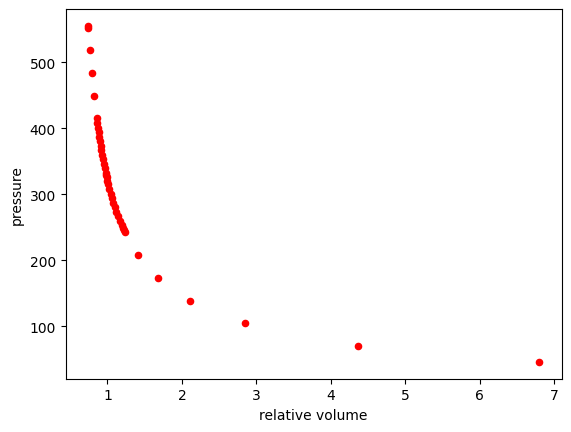

In [4]:
reservoirTemperature = 80.6 #Celius
reservoirPressure = 320.8 #bara

testSeparatorTemperature = 20.6 # Celcius
testSeparatorPressure = 86.8 # bara
GORseparartorConditions = 58959.0 # Sm3 gas//m3 condesate

GORstandardConditions = 55000.0 # Sm3 gas/Sm3 condesate


# Define a dictionary with PVT data
PVTdata = {'pressure':  [555.3,552,518.5,484,449.5,415.3,408.1,401.3,394.3,387.3,380.7,373.8,366.7,360,352.9,346.2,339.3,332.3,329.9,325.6,320,315.1,308.4,301.3,294.5,287.6,280.6,273.8,266.9,259.9,253.1,249.5,246.1,242.7,208.2,173.6,139,104.5,70,46.1],
        'relative volume': [0.741,0.7431,0.766,0.7917,0.821,0.8551,0.8631,0.871,0.8795,0.8883,0.8972,0.9066,0.9169,0.9272,0.9385,0.9498,0.9621,0.9751,0.9797,0.9883,1,1.0105,1.0258,1.0428,1.0602,1.0787,1.0989,1.1197,1.1423,1.1668,1.1924,1.2064,1.2202,1.2346,1.4135,1.6806,2.1038,2.8422,4.3612,6.796],
        'Zgas': [1.247,1.244,1.204,1.162,1.119,1.077,1.068,1.06,1.051,1.043,1.035,1.027,1.019,1.012,1.004,0.997,0.99,0.982,0.98,0.976,0.97,0.965,0.959,0.952,0.946,0.941,0.935,0.929,0.924,0.919,0.915,0.912,0.91,0.908,0.892,0.884,0.887,0.9,0.926,0.95],
        'Density': [0.2671,0.2663,0.2583,0.2499,0.241,0.2314,0.2293,0.2272,0.225,0.2227,0.2206,0.2183,0.2158,0.2134,0.2108,0.2083,0.2057,0.2029,0.202,0.2002,0.1979,0.1958,0.1929,0.1898,0.1866,0.1834,0.1801,0.1767,0.1732,0.1696,0.1659,0.164,0.1622,0.1603,0.14,0.1177,0.0941,0.0696,0.0454,0.0291],
        'Bg': [0.0027,0.0027,0.0028,0.0029,0.003,0.0032,0.0032,0.0032,0.0032,0.0033,0.0033,0.0033,0.0034,0.0034,0.0035,0.0035,0.0036,0.0036,0.0036,0.0036,0.0037,0.0037,0.0038,0.0038,0.0039,0.004,0.0041,0.0041,0.0042,0.0043,0.0044,0.0045,0.0045,0.0046,0.0052,0.0062,0.0078,0.0105,0.0161,0.0251],
        'gasexpansionfactor': [365.6,364.6,353.7,342.2,330,316.8,313.9,311,308,305,302,298.8,295.5,292.2,288.7,285.2,281.6,277.8,276.5,274.1,270.9,268.1,264.1,259.8,255.5,251.1,246.5,241.9,237.2,232.2,227.2,224.6,222,219.4,191.7,161.2,128.8,95.3,62.1,39.9],
        'gasviscosity': [0.0325,0.0324,0.0313,0.0301,0.0288,0.0276,0.0273,0.027,0.0268,0.0265,0.0262,0.0259,0.0257,0.0254,0.0251,0.0248,0.0245,0.0243,0.0242,0.024,0.0237,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        }

# Convert the PVT data dictionary into DataFrame
CMEdataFrame = pd.DataFrame(PVTdata)
CMEpressures = CMEdataFrame['pressure'].tolist()
CMEtemperature = [80.6+273.15]*len(CMEpressures)

#print and plot the PVT data
print(CMEdataFrame.head(50).to_string())

print("plotting experimental PVT data.....")
CMEdataFrame.plot(kind='scatter',x='relative volume',y='pressure',color='red')
plt.show()



# 2. Set up fluid based on fluid composition and properties from PVT report, calculate and compare to measured PVT properties from PVT report

A fluid in neqsim is set up in the following script. We the flash the fluid to calculate the GOR at test separator and standard conditions. Further we will plot the phase envelope of the fluid.

## Setting up the fluid based on the PVT report
In the follwing script we create a neqsim fluid based on composition and data for oil components (molar mass and density) from the PVT report. We will then calcuate the phase envelope based on this fluid characterization.

phase envelope for characterized fluid


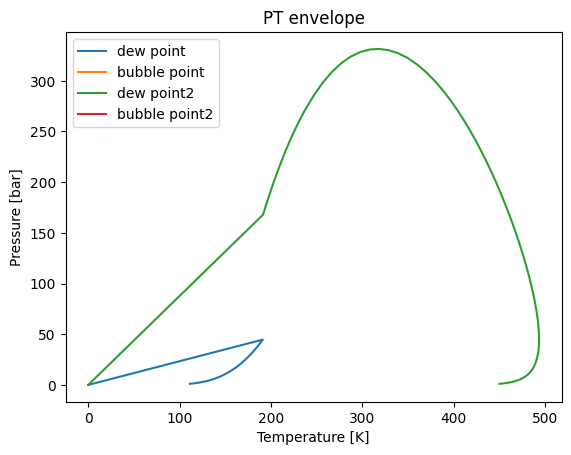

<java object 'neqsim.thermodynamicOperations.ThermodynamicOperations'>

In [21]:
# Running PVTsimulation with default fluid
characterizedFluid = fluid_df(compositionDataFrame, lastIsPlusFraction=True)
print('phase envelope for characterized fluid')
phaseenvelope(characterizedFluid, True)

## Compare neqsim calculations to data from PVT report
In the folllowing script we run neqsim simulations to compare how well the PVT data from the PVT report can be represented by the default fluid characterization. NeqSim will by default use SRK-EoS with Peneloux volume correction.

We start by comparing to measured GOR at separator and standard conditions.

In [6]:
characterizedFluid.setTemperature(15.0, "C")
characterizedFluid.setPressure(1.01325, "bara")
TPflash(characterizedFluid)
#printFLuidCharacterisation(characterizedFluid) #print componentnames, TC, PC, acs, molar mass, density,
printFrame(characterizedFluid)
GORcalcstd = characterizedFluid.getPhase("gas").getNumberOfMolesInPhase()*8.314*288.15/101325  / (characterizedFluid.getPhase("oil").getVolume("m3"))
print("GOR at standard conditions ", GORcalcstd, " Sm3 gas/m3 oil. ", " Deviation from PVT report: ", (GORcalcstd-GORstandardConditions)/GORstandardConditions*100, " %")

characterizedFluid.setTemperature(testSeparatorTemperature, "C")
characterizedFluid.setPressure(testSeparatorPressure, "bara")
TPflash(characterizedFluid)
GORcalc = characterizedFluid.getPhase("gas").getNumberOfMolesInPhase()*8.314*288.15/101325  / (characterizedFluid.getPhase("oil").getVolume("m3"))
print("GOR at test separator conditions: ", GORcalc, " Sm3 gas/m3 oil" , " Deviation from PVT report: ", (GORcalc-GORseparartorConditions)/GORseparartorConditions*100, " %")

#Calculating saturation pressure
#characterizedFluid.setTemperature(reservoirTemperature, "C")
#calcSatPres = saturationpressure(characterizedFluid)
#print("Saturation pressure : ", calcSatPres, " [bara]" , " Deviation from PVT report: ", (calcSatPres-reservoirPressure), " bar")

| 0                  | 1          | 2           | 3           | 4   | 5   | 6               |
|:-------------------|:-----------|:------------|:------------|:----|:----|:----------------|
|                    | total      | GAS         | OIL         |     |     |                 |
| nitrogen           | 9.72E-3    | 9.73274E-3  | 1.72831E-5  |     |     | [mole fraction] |
| CO2                | 6.32E-3    | 6.32806E-3  | 1.8437E-4   |     |     | [mole fraction] |
| methane            | 9.5111E-1  | 9.52352E-1  | 5.34338E-3  |     |     | [mole fraction] |
| ethane             | 2.553E-2   | 2.55623E-2  | 9.62784E-4  |     |     | [mole fraction] |
| propane            | 1.04E-3    | 1.04116E-3  | 1.55278E-4  |     |     | [mole fraction] |
| i-butane           | 1.21E-3    | 1.21097E-3  | 4.69514E-4  |     |     | [mole fraction] |
| n-butane           | 2.1E-4     | 2.10114E-4  | 1.23455E-4  |     |     | [mole fraction] |
| i-pentane          | 6.6E-4     | 6.59488E-4  | 1.04966E-3

## Comparing to PVT data
In this case CME (constant mass expansion) experiments have been performed, and we will compare to these data.

    pressure  sim relative volume   Zgassim  densitysim     Bgsim  gasviscositysim
0      555.3             0.787263  1.286545  315.508791  0.002318         0.000040
1      552.0             0.789001  1.281722  314.802940  0.002323         0.000039
2      518.5             0.807899  1.232773  307.325121  0.002379         0.000038
3      484.0             0.830146  1.182434  298.964898  0.002446         0.000036
4      449.5             0.855941  1.132273  289.823362  0.002523         0.000035
5      415.3             0.886009  1.082873  279.849007  0.002613         0.000033
6      408.1             0.893032  1.072534  277.617376  0.002634         0.000033
7      401.3             0.899918  1.062794  275.463856  0.002655         0.000032
8      394.3             0.907277  1.052796  273.198594  0.002677         0.000032
9      387.3             0.914930  1.042828  270.882252  0.002699         0.000032
10     380.7             0.922431  1.033461  268.649595  0.002722         0.000031
11  

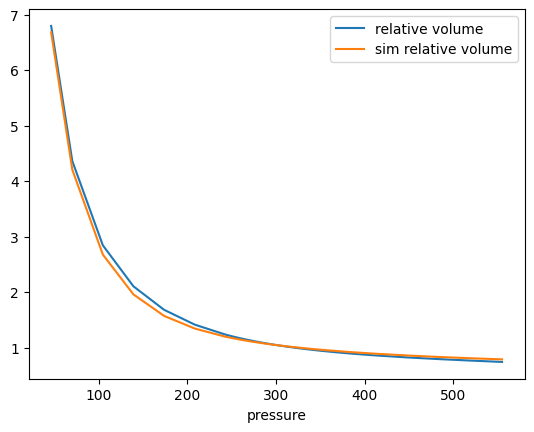

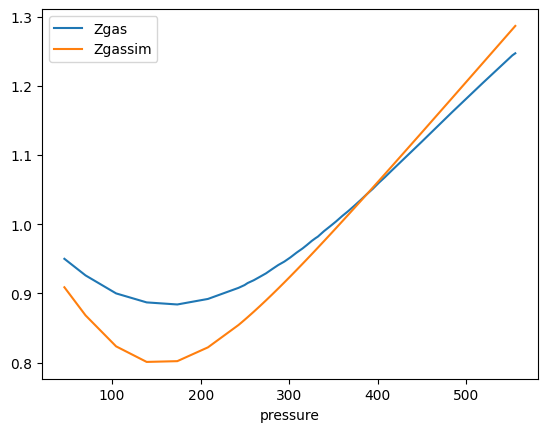

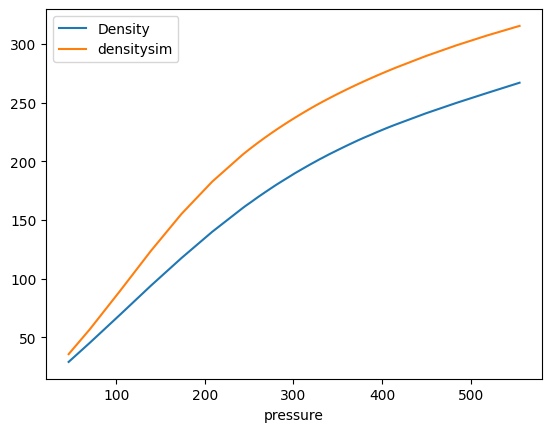

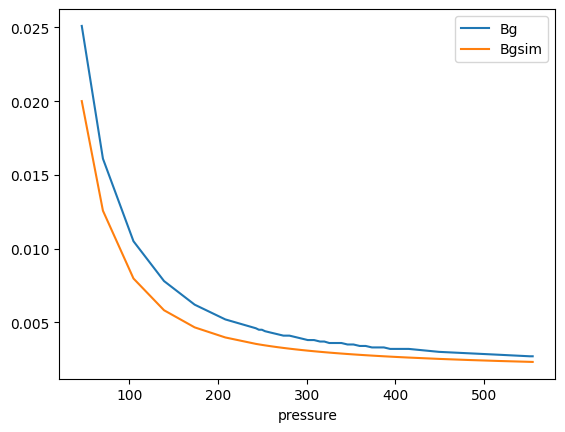

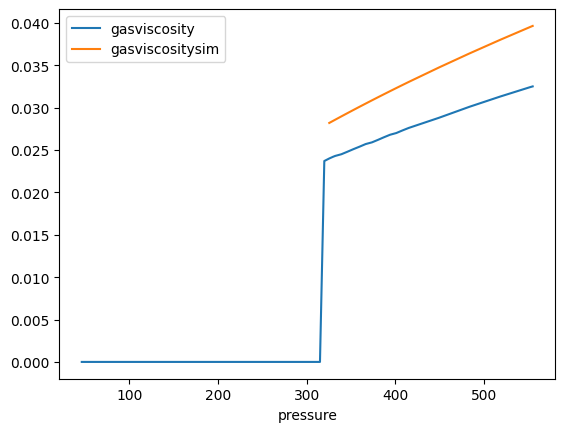

Deviation analysis...
Average deviation relative volume:  0.4194984949061425  %   Max devation  6.243340484245914  %


In [7]:
simrelativevolume = []
simliquidrelativevolume = []
Zgas =  []
Bgsim=[]
densitysim =  []
Yfactor = []
isothermalcompressibility = []
gasviscositysim = []
saturationPressure = None
CME(characterizedFluid,CMEpressures,CMEtemperature,saturationPressure,simrelativevolume, simliquidrelativevolume,Zgas,Yfactor,isothermalcompressibility,densitysim,Bgsim, gasviscositysim)
CMEsimdataFrame = pd.DataFrame(numpy.transpose([CMEpressures, simrelativevolume,Zgas, densitysim, Bgsim, gasviscositysim]), columns=["pressure", "sim relative volume","Zgassim", "densitysim", "Bgsim", "gasviscositysim"])
print(CMEsimdataFrame.head(50).to_string())
print("saturation pressure simulated ", saturationPressure)
pd.concat([CMEdataFrame['pressure'], CMEdataFrame['relative volume'],CMEsimdataFrame['sim relative volume']],axis=1).plot(x='pressure')
pd.concat([CMEdataFrame['pressure'], CMEdataFrame['Zgas'],CMEsimdataFrame['Zgassim']],axis=1).plot(x='pressure')
pd.concat([CMEdataFrame['pressure'], CMEdataFrame['Density']*1e3,CMEsimdataFrame['densitysim']],axis=1).plot(x='pressure')
pd.concat([CMEdataFrame['pressure'], CMEdataFrame['Bg'],CMEsimdataFrame['Bgsim']],axis=1).plot(x='pressure')
pd.concat([CMEdataFrame['pressure'], CMEdataFrame['gasviscosity'],CMEsimdataFrame['gasviscositysim']*1e3],axis=1).plot(x='pressure',kind="line")

matplotlib.pyplot.show()

devanalysisframe = pd.concat([CMEdataFrame['pressure'], (CMEsimdataFrame['sim relative volume']-CMEdataFrame['relative volume'])/CMEdataFrame['relative volume']*100.0],axis=1)
print("Deviation analysis...")
print("Average deviation relative volume: ", devanalysisframe[0].mean(), " %", "  Max devation ", devanalysisframe[0].max() , " %")





# 3. Selection of parameters to fit, and fit model to PVT data
To be done...

# 4. Gerenation of properties for multi phase flow meter

A typical multi phase flow meter will need calclation of various thermodynamic and physical properties. Such properties have to be updated as the field is produced. The input to the property calculations are a characterized fluid composition from PVT studies.

The following script demonstrates calculation of PVT properties for a multi phase flow meter using a characterized fluid composition.

In [10]:
#Creating property tables
def calc_mpm_PVT_table():
  pressures = [150.0, 170.0, 180.0, 200.0, 270.0]
  temperatures = [30.0, 40.0, 50.0, 60.0, 80.0]

  numP = len(pressures)
  numT = len(temperatures)

  gasViscosity = numpy.zeros((numP, numT))
  oilViscosity = numpy.zeros((numP, numT))
  gasDensity = numpy.zeros((numP, numT))
  oilDensity = numpy.zeros((numP, numT))
  GORcalc  = numpy.zeros((numP, numT))
  GORactual = numpy.zeros((numP, numT))
  surfaceTension = numpy.zeros((numP, numT))
  gasViscosity[:] = np.NaN
  oilViscosity[:] = np.NaN
  gasDensity[:] = np.NaN
  oilDensity[:] = np.NaN
  GORcalc[:] = np.NaN
  GORactual[:] = np.NaN
  surfaceTension[:] = np.NaN

  for i in range(len(temperatures)):
    for j in range(len(pressures)):
      characterizedFluid.setPressure(pressures[j])
      characterizedFluid.setTemperature(temperatures[i]+273.15)
      TPflash(characterizedFluid)
      characterizedFluid.initProperties()
      if(characterizedFluid.hasPhaseType("gas")):
        gasViscosity[j][i]=characterizedFluid.getPhase("gas").getViscosity("cP")
        gasDensity[j][i]=characterizedFluid.getPhase("gas").getDensity("kg/m3")
      if(characterizedFluid.hasPhaseType("oil")):
        oilViscosity[j][i]=characterizedFluid.getPhase("oil").getViscosity("cP")
        oilDensity[j][i]=characterizedFluid.getPhase("oil").getDensity("kg/m3")
      if(characterizedFluid.hasPhaseType("gas") and characterizedFluid.hasPhaseType("oil")):
        GORcalc[j][i] = characterizedFluid.getPhase("gas").getNumberOfMolesInPhase()*8.314*288.15/101325  / (characterizedFluid.getPhase("oil").getVolume("m3"))
        GORactual[j][i] =   (characterizedFluid.getPhase("gas").getVolume("m3"))/ (characterizedFluid.getPhase("oil").getVolume("m3"))
        surfaceTension[j][i]  = characterizedFluid.getInterfacialTension('gas', 'oil')

  gasDensityDataFrame = pd.DataFrame(gasDensity,index=pressures, columns=temperatures)
  oilDensityDataFrame = pd.DataFrame(oilDensity,index=pressures, columns=temperatures)
  gasviscosityDataFrame = pd.DataFrame(gasViscosity,index=pressures, columns=temperatures)
  oilviscosityDataFrame = pd.DataFrame(oilViscosity,index=pressures, columns=temperatures)
  GORcalcFrame = pd.DataFrame(GORcalc,index=pressures, columns=temperatures)
  GORactualFrame = pd.DataFrame(GORactual,index=pressures, columns=temperatures)
  surfaceTensionFrame= pd.DataFrame(surfaceTension,index=pressures, columns=temperatures)

  print("gas density [kg/m3]")
  print(gasDensityDataFrame.tail())
  print("oil density [kg/m3]")
  print(oilDensityDataFrame.head())
  print("gas viscosity [(mPa.s)]")
  print(gasviscosityDataFrame.tail())
  print("oil viscosity [(mPa.s)]")
  print(oilviscosityDataFrame.head())
  #print("GOR (Sm3/m3)")
  #print(GORcalcFrame.head())
  print("GOR actual (m3/m3)")
  print(GORactualFrame.head())
  print("Surface Tension (N/m)")
  print(surfaceTensionFrame.head())

#run calcs
calc_mpm_PVT_table()

gas density [kg/m3]
             30.0        40.0        50.0        60.0        80.0
150.0  122.110568  115.093446  109.019527  103.699354   94.787674
170.0  138.607858  130.607792  123.652271  117.546446  107.309584
180.0  146.510127  138.092645  130.748740  124.287626  113.435533
200.0  161.523924  152.426968  144.421820  137.336029  125.366420
270.0  205.463033  195.329764  186.108070  177.720091  163.120031
oil density [kg/m3]
             30.0        40.0        50.0        60.0        80.0
150.0  696.876009  701.491630  705.933919  710.143892  717.824190
170.0  695.577036  700.012849  704.364428  708.571266  716.533140
180.0  695.757528  700.028785  704.282494  708.453412  716.519340
200.0  697.782896  701.605585  705.578434  709.617741  717.797698
270.0  721.446740  722.698548  724.611644  726.951681  731.974466
gas viscosity [(mPa.s)]
           30.0      40.0      50.0      60.0      80.0
150.0  0.016654  0.016559  0.016528  0.016547  0.016686
170.0  0.017760  0.017555  0.017

## How to update molar composition and run a new calculation

In [15]:
printFrame(characterizedFluid)

| 0                  | 1          | 2          | 3           | 4   | 5   | 6               |
|:-------------------|:-----------|:-----------|:------------|:----|:----|:----------------|
|                    | total      | GAS        | OIL         |     |     |                 |
| nitrogen           | 9.72E-3    | 9.72106E-3 | 3.49793E-3  |     |     | [mole fraction] |
| CO2                | 6.32E-3    | 6.31987E-3 | 7.08254E-3  |     |     | [mole fraction] |
| methane            | 9.5111E-1  | 9.51177E-1 | 5.59037E-1  |     |     | [mole fraction] |
| ethane             | 2.553E-2   | 2.55293E-2 | 2.96963E-2  |     |     | [mole fraction] |
| propane            | 1.04E-3    | 1.03986E-3 | 1.88734E-3  |     |     | [mole fraction] |
| i-butane           | 1.21E-3    | 1.20972E-3 | 2.88214E-3  |     |     | [mole fraction] |
| n-butane           | 2.1E-4     | 2.09935E-4 | 5.91691E-4  |     |     | [mole fraction] |
| i-pentane          | 6.6E-4     | 6.5969E-4  | 2.48727E-3  |     |  

In [20]:
#print component names and composition
print(characterizedFluid.getComponentNames())
print(characterizedFluid.getMolarComposition())

#set new composition of fluid
updatedmolfractions = [0.009719999999999994, 0.006319999999999997, 0.8511099999999995, 0.125529999999999983, 0.0010399999999999993, 0.0012099999999999993, 0.0002099999999999999, 0.0006599999999999997, 0.0001999999999999999, 0.0005799999999999997, 0.0010699999999999996, 0.0007299999999999995, 0.00043999999999999974, 0.000371792625156688, 0.00025464897112775016, 0.00017441469816431438, 0.00011946047455454978, 8.182111445305967e-05, 7.704336943041581e-05, 6.167791774558761e-05, 3.914082936839355e-05]
characterizedFluid.setMolarComposition(updatedmolfractions)

#Run a flash and check composition
TPflash(characterizedFluid, temperature=20.0, tUnit='C', pressure=1.01325, pUnit='bara' )
printFrame(characterizedFluid)

#make new table for MPM with updated composition
calc_mpm_PVT_table()

['nitrogen', 'CO2', 'methane', 'ethane', 'propane', 'i-butane', 'n-butane', 'i-pentane', 'n-pentane', 'C6_PC', 'C7_PC', 'C8_PC', 'C9_PC', 'C10-11_PC', 'C12-13_PC', 'C14-15_PC', 'C16-17_PC', 'C18-19_PC', 'C20-22_PC', 'C23-27_PC', 'C28-79_PC']
[0.009719999999999994, 0.006319999999999997, 0.8511099999999995, 0.12552999999999995, 0.001039999999999999, 0.001209999999999999, 0.00020999999999999987, 0.0006599999999999997, 0.0001999999999999999, 0.0005799999999999996, 0.0010699999999999993, 0.0007299999999999994, 0.0004399999999999997, 0.000371792625156688, 0.0002546489711277501, 0.00017441469816431438, 0.00011946047455454975, 8.182111445305967e-05, 7.70433694304158e-05, 6.16779177455876e-05, 3.914082936839355e-05]
| 0                  | 1          | 2           | 3           | 4   | 5   | 6               |
|:-------------------|:-----------|:------------|:------------|:----|:----|:----------------|
|                    | total      | GAS         | OIL         |     |     |                 |
|